# Question
Build an ANN model for Drug classification. 
This project aims to analyze the relationship between various medical parameters and drug effectiveness. The dataset consists of patient information, including age, sex, blood pressure levels (BP), cholesterol levels, sodium-to-potassium ratio (Na_to_K), drug type, and corresponding labels. The goal is to develop a model that can accurately predict the class or category of a given drug based on its features. 
Dataset Link: https://www.kaggle.com/datasets/prathamtripathi/drug-classification 

Task 1: Read the dataset and do data pre-processing 
Task 2: Build the ANN model with (input layer, min 3 hidden layers & output layer) 
Task 3: Test the model with random data

In [4]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df = pd.read_csv('drug200.csv')
df

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


In [7]:
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [14]:
df.isnull().all()

Age            False
Sex            False
BP             False
Cholesterol    False
Na_to_K        False
Drug           False
dtype: bool

In [15]:
df.info

<bound method DataFrame.info of      Age Sex      BP Cholesterol  Na_to_K   Drug
0     23   F    HIGH        HIGH   25.355  DrugY
1     47   M     LOW        HIGH   13.093  drugC
2     47   M     LOW        HIGH   10.114  drugC
3     28   F  NORMAL        HIGH    7.798  drugX
4     61   F     LOW        HIGH   18.043  DrugY
..   ...  ..     ...         ...      ...    ...
195   56   F     LOW        HIGH   11.567  drugC
196   16   M     LOW        HIGH   12.006  drugC
197   52   M  NORMAL        HIGH    9.894  drugX
198   23   M  NORMAL      NORMAL   14.020  drugX
199   40   F     LOW      NORMAL   11.349  drugX

[200 rows x 6 columns]>

In [16]:
df.shape

(200, 6)

In [13]:
df.describe

<bound method NDFrame.describe of      Age Sex      BP Cholesterol  Na_to_K   Drug
0     23   F    HIGH        HIGH   25.355  DrugY
1     47   M     LOW        HIGH   13.093  drugC
2     47   M     LOW        HIGH   10.114  drugC
3     28   F  NORMAL        HIGH    7.798  drugX
4     61   F     LOW        HIGH   18.043  DrugY
..   ...  ..     ...         ...      ...    ...
195   56   F     LOW        HIGH   11.567  drugC
196   16   M     LOW        HIGH   12.006  drugC
197   52   M  NORMAL        HIGH    9.894  drugX
198   23   M  NORMAL      NORMAL   14.020  drugX
199   40   F     LOW      NORMAL   11.349  drugX

[200 rows x 6 columns]>

<AxesSubplot:xlabel='Drug', ylabel='count'>

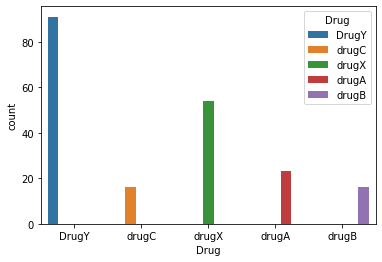

In [32]:
sns.countplot(x='Drug',data=df,hue='Drug')     

In [33]:
X=df.iloc[:,0:5]
Y=df['Drug']

In [34]:
Y_class=len(np.unique(Y))
print(Y_class)

5


In [35]:
X

,Age,Sex,BP,Cholesterol,Na_to_K
0,23,F,HIGH,HIGH,25.355
1,47,M,LOW,HIGH,13.093
2,47,M,LOW,HIGH,10.114
3,28,F,NORMAL,HIGH,7.798
4,61,F,LOW,HIGH,18.043
...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567
196,16,M,LOW,HIGH,12.006
197,52,M,NORMAL,HIGH,9.894
198,23,M,NORMAL,NORMAL,14.020


In [21]:
Y

0      DrugY
1      drugC
2      drugC
3      drugX
4      DrugY
       ...  
195    drugC
196    drugC
197    drugX
198    drugX
199    drugX
Name: Drug, Length: 200, dtype: object

In [36]:
from sklearn.preprocessing import LabelEncoder

X=pd.get_dummies(X,columns=['Sex','BP','Cholesterol'],drop_first = True)
Le=LabelEncoder()
Y=Le.fit_transform(Y)

In [37]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.4,random_state=10)     

In [38]:
from sklearn.preprocessing import StandardScaler

sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)

In [39]:
from tensorflow import keras
Y_train=keras.utils.to_categorical(Y_train)
Y_test=keras.utils.to_categorical(Y_test)

In [40]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

mod=Sequential()
mod.add(Dense(48,input_dim=6, activation='relu'))
mod.add(Dense(36,activation='relu'))
mod.add(Dense(24,activation='relu'))
mod.add(Dense(12,activation='relu'))
mod.add(Dense(Y_class,activation='softmax'))

In [42]:
mod.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])     

In [43]:
mod.fit(X_train,Y_train,epochs=48,batch_size=6)

Epoch 1/48
20/20 [==============================] - 4s 4ms/step - loss: 1.5573 - accuracy: 0.3250
Epoch 2/48
20/20 [==============================] - 0s 4ms/step - loss: 1.4643 - accuracy: 0.5667
Epoch 3/48
20/20 [==============================] - 0s 4ms/step - loss: 1.3311 - accuracy: 0.6833
Epoch 4/48
20/20 [==============================] - 0s 4ms/step - loss: 1.1402 - accuracy: 0.7500
Epoch 5/48
20/20 [==============================] - 0s 4ms/step - loss: 0.9213 - accuracy: 0.7333
Epoch 6/48
20/20 [==============================] - 0s 4ms/step - loss: 0.7377 - accuracy: 0.7417
Epoch 7/48
20/20 [==============================] - 0s 4ms/step - loss: 0.6065 - accuracy: 0.7500
Epoch 8/48
20/20 [==============================] - 0s 4ms/step - loss: 0.5262 - accuracy: 0.7917
Epoch 9/48
20/20 [==============================] - 0s 3ms/step - loss: 0.4584 - accuracy: 0.8167
Epoch 10/48
20/20 [==============================] - 0s 4ms/step - loss: 0.3857 - accuracy: 0.8667
Epoch 11/48
20/20 [

In [46]:
test_loss,test_acc=mod.evaluate(X_test,Y_test)
print('Test Accuracy:',test_acc*100)

3/3 [==============================] - 0s 4ms/step - loss: 0.4782 - accuracy: 0.8500
Test Accuracy: 85.00000238418579


In [51]:
pred = mod.predict(X_test[:1])

1/1 [==============================] - 0s 20ms/step


In [52]:
pred

array([[9.9998724e-01, 5.9284008e-07, 1.0111640e-06, 1.1128964e-05,
        6.6235086e-12]], dtype=float32)